# Taller 2 19 Oct.

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
import matplotlib as plt

In [20]:
!wget https://raw.githubusercontent.com/dianagils/INF-280/main/avocado.csv

--2023-10-20 01:44:24--  https://raw.githubusercontent.com/dianagils/INF-280/main/avocado.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1989197 (1.9M) [text/plain]
Saving to: ‘avocado.csv.1’

avocado.csv.1       100%[===================>]   1.90M  --.-KB/s    in 0.08s   

2023-10-20 01:44:25 (24.5 MB/s) - ‘avocado.csv.1’ saved [1989197/1989197]



In [21]:
data = pd.read_csv('/content/avocado.csv')

# Preguntas
## Análisis exploratorio de Datos **(40 pts)**

1. **(5 pts c/u)** Realice un boxplot para comparar el precio promedio de las paltas convencionales y las orgánicas. Responda si las siguientes afirmaciones son **Verdaderas o Falsas**. **Justifique en ambos casos**

> 1. La mediana del precio de las paltas convencionales es mayor que la mediana del precio de las paltas orgánicas.
> 2. El precio de las paltas orgánicas presentan una mayor variabilidad que el precio de las paltas convencionales.
> 3. La mayoría de los precios de las paltas orgánicas están por encima de la mediana del precio de las paltas convencionales.

2. **(5 pts c/u)** Considerando solamente las paltas convencionales, realice un boxplot para comparar el precio promedio de las paltas según el año. Responda si las siguientes afirmaciones son **Verdaderas o Falsas**. **Justifique en ambos casos**

> 1. El precio de las paltas convencionales del año 2018 presenta la mayor variabilidad.
> 2. El precio mediano de las paltas convencionales ha ido aumentando a lo largo de los años.
> 3. El 50% de las paltas de mayor precio del año 2017 son más costosas que el 75% de las paltas de menor precio del año 2015.

3. **(10 pts)** Si un boxplot **NO** presenta outliers, ¿Esto significa que los datos se distribuyen de manera uniforme?


## Estimación de Parámetros **(60 pts)**

1. Si tenemos 3 estimadores distintos, $θ{1}$, $θ{2}$ y $θ_{3}$, calculados cada uno en una muestra aleatoria (no
necesariamente igual) de 500, 500 y 3000 datos respectivamente. Responda las siguientes preguntas:

    a) **(10pts)** Si fueron calculados con MV (máxima verosimilitud) ¿El estimador $θ{1}$ tiene el mismo sesgo que $θ{2}$ o que $θ{3}$? ¿El estimador $θ{3}$ tiene menor varianza que el estimador $θ_{1}$?

    b) **(10pts)** Si fueron calculados con MV sobre el mismo modelo $f$ ¿Cuál estimador se ajusta y explica mejor los datos de su muestra?

2. **(30pts)** Considerando lo definido en la parte 2 sobre el estimador insesgado de la media, modifique el proceso de estimación de las preguntas 8, 9, 10 y 11, tomando en cuenta las siguientes consideraciones:

*   La población sigue una distribución de Laplace, $x ~ Laplace(\mu, b)$ con b conocido.

*   La función *minimize* **NO** puede ser utilizada. Como alternativa, debe implementar un método de optimización aproximado denominado el método de la Bisección ([Ver más](http://www.mecapedia.uji.es/pages/metodo_de_la_biseccion.html)), el cual es un método utilizado para hallar la raíz de una función no lineal definida en $\mathbb{R}$. Notar que debe seguir el proceso que normalmente seguiría para maximizar una función. Comente explicitamente la función que se está maximizando.

3. **(10pts)** En el contexto del ajuste de distribuciones estadísticas a datos observados, se pueden utilizar distribuciones con uno o dos parámetros. ¿Por qué podría ser preferible utilizar una distribución con 2 parámetros en lugar de "congelar" uno de ellos a un valor fijo? Dé algún ejemplo.

# Desarrollo

### Análisis exploratorio de Datos

In [22]:
# Dataframe sin inconsistencias
dataCorrecta =  data[((data['4046'] + data['4225'] + data['4770'] + data['Total Bags']) == data['Total Volume'] ) & ((data['Small Bags'] + data['Large Bags'] + data['XLarge Bags']) == data['Total Bags'] )]
dataCorrecta.reset_index(inplace = True)

In [23]:
# Dataframe que almacena paltas convencionales y orgánicas extraido del dataframe sin inconsistencias
df_conv_org = dataCorrecta[(dataCorrecta['type'] == 'conventional') | (dataCorrecta['type'] == 'organic')]

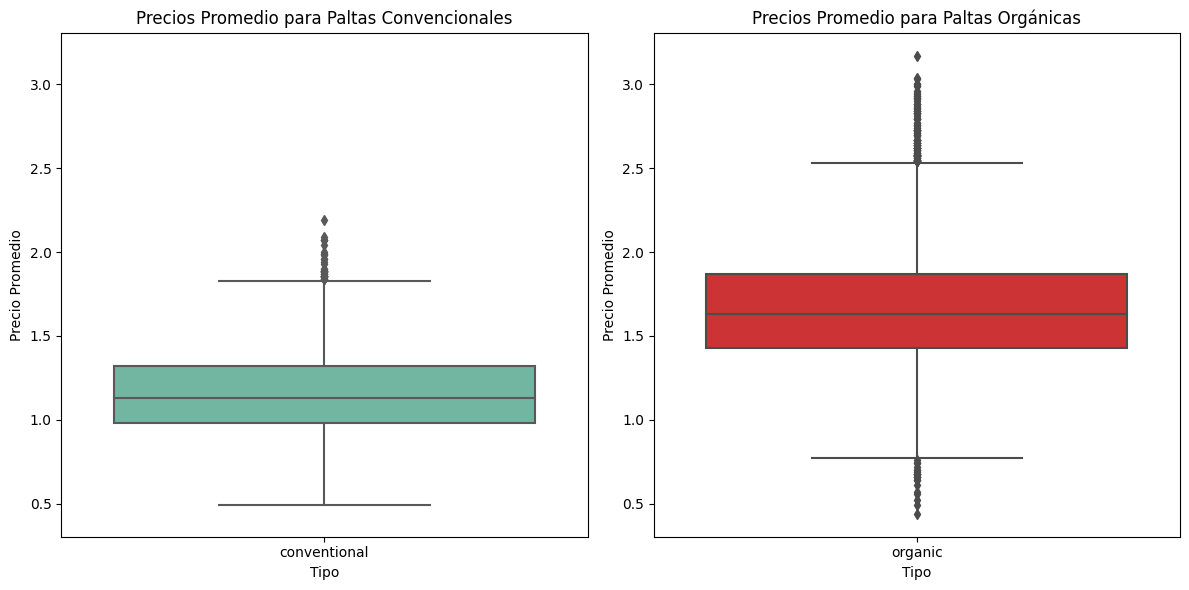

In [24]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot paltas Convencionales
sns.boxplot(x='type', y='AveragePrice', data=df_conv_org[df_conv_org['type'] == 'conventional'], palette='Set2', ax=axes[0])
axes[0].set_title('Precios Promedio para Paltas Convencionales')
axes[0].set_xlabel('Tipo')
axes[0].set_ylabel('Precio Promedio')

# Boxplot paltas Orgánicas
sns.boxplot(x='type', y='AveragePrice', data=df_conv_org[df_conv_org['type'] == 'organic'], palette='Set1', ax=axes[1])
axes[1].set_title('Precios Promedio para Paltas Orgánicas')
axes[1].set_xlabel('Tipo')
axes[1].set_ylabel('Precio Promedio')

# Mismo rango para ambos
axes[0].set_ylim(axes[1].get_ylim())

plt.tight_layout()
plt.show()

Preguntas:
> 1. La mediana del precio de las paltas convencionales es mayor que la mediana del precio de las paltas orgánicas.
> 2. El precio de las paltas orgánicas presentan una mayor variabilidad que el precio de las paltas convencionales.
> 3. La mayoría de los precios de las paltas orgánicas están por encima de la mediana del precio de las paltas convencionales.

>Respuesta 1. Falso, al analizar la línea de la mediana en ambos boxplot, se ve que la mediana del precio de las paltas orgánicas es mayor a 1.5, en cambio en el precio de las paltas convencionales es menor que 1.5.

>Respuesta 2. Verdadero, pues el rango intercuartil del boxplot del precio de paltas orgánicas es mayor al del boxplot de paltas convencionales, además de presentar valores atípicos (outliers), los cuales indican mayor variabilidad de los datos.

>Respuesta 3. Verdadero, ya que el boxplot del precio de paltas orgánicas está sobre el boxplot del precio de paltas convencionales

Text(0, 0.5, 'Precio Promedio')

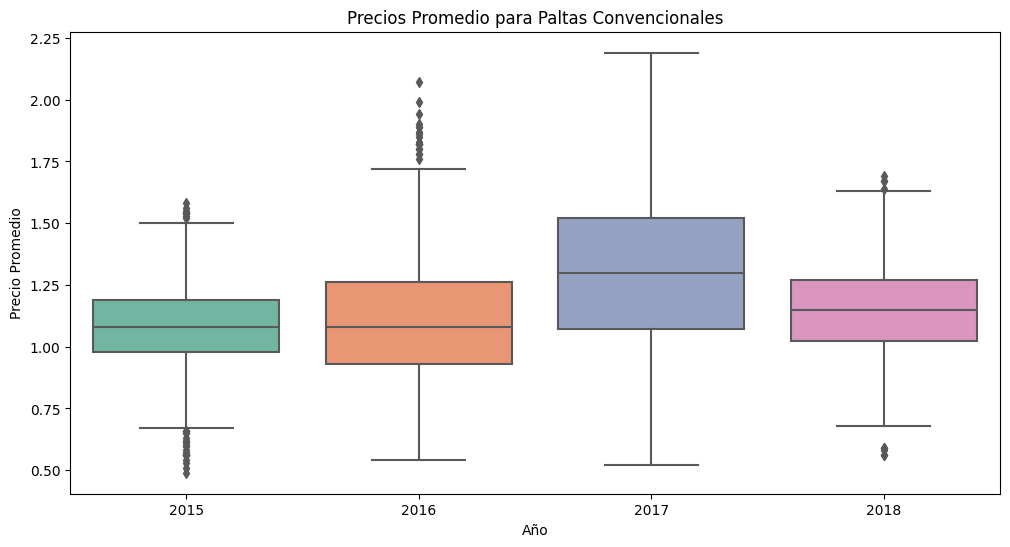

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

sns.boxplot(x='year', y='AveragePrice', data=df_conv_org[df_conv_org['type'] == 'conventional'], palette='Set2')
plt.title('Precios Promedio para Paltas Convencionales')
plt.xlabel('Año')
plt.ylabel('Precio Promedio')

Preguntas
1. El precio de las paltas convencionales del año 2018 presenta la mayor variabilidad.
2. El precio mediano de las paltas convencionales ha ido aumentando a lo largo de los años.
3. El 50% de las paltas de mayor precio del año 2017 son más costosas que el 75% de las paltas de menor precio del año 2015.

> Respuesta 1. Falso, ya que el rango intercuartil en el boxplot de los precios en el año 2017 es más grande que la del año 2018, lo que significa mayor variabilidad.

> Respuesta 2. No, si bien aumentó desde 2016 a 2017, volvió a bajar desde 2017 a 2018, lo que indica que si bien aumentó comparado al año 2015, desde 2017 se consideraría que está bajando el precio.

> Respuesta 3. Verdadero, ya que proyectando el 3er cuartil del precio en el año 2017 supera al 3er cuartil del año 2015.

Si un boxplot **NO** presenta outliers, ¿Esto significa que los datos se distribuyen de manera uniforme?

> Respuesta: No, si no presenta outliers no necesariamente quiere decir que los datos se distribuyen de manera uniforme. Luego, en caso de que no hubieran outliers, indicaria que los datos no se desvian significativamente de la mayoría de los datos.

### Estimación de Parámetros

1. Si tenemos 3 estimadores distintos, $θ{1}$, $θ{2}$ y $θ_{3}$, calculados cada uno en una muestra aleatoria (no
necesariamente igual) de 500, 500 y 3000 datos respectivamente. Responda las siguientes preguntas:

    a) **(10pts)** Si fueron calculados con MV (máxima verosimilitud) ¿El estimador $θ{1}$ tiene el mismo sesgo que $θ{2}$ o que $θ{3}$? ¿El estimador $θ{3}$ tiene menor varianza que el estimador $θ_{1}$?

    b) **(10pts)** Si fueron calculados con MV sobre el mismo modelo $f$ ¿Cuál estimador se ajusta y explica mejor los datos de su muestra?

>Respuesta 1.A) Ya que las muestras no son necesariamente iguales, no se puede asegurar que los sesgos de los estimadores sean los mismos. Como el sesgo debería ser menor para una muestra más grande, la varianza sería de hecho mayor para $θ_{3}$ según la formula de error cuadrático medio.

>Respuesta 1.B) El estimador que mejor se ajusta es $θ_{3}$, ya que fue calculado a partir de una muestra más grande.

2. **(30pts)** Considerando lo definido en la parte 2 sobre el estimador insesgado de la media, modifique el proceso de estimación de las preguntas 8, 9, 10 y 11, tomando en cuenta las siguientes consideraciones:

*   La población sigue una distribución de Laplace, $x ~ Laplace(\mu, b)$ con b conocido.

*   La función *minimize* **NO** puede ser utilizada. Como alternativa, debe implementar un método de optimización aproximado denominado el método de la Bisección ([Ver más](http://www.mecapedia.uji.es/pages/metodo_de_la_biseccion.html)), el cual es un método utilizado para hallar la raíz de una función no lineal definida en $\mathbb{R}$. Notar que debe seguir el proceso que normalmente seguiría para maximizar una función. Comente explicitamente la función que se está maximizando.

In [26]:
dataCorrecta =  data[((data['4046'] + data['4225'] + data['4770'] + data['Total Bags']) == data['Total Volume'] ) & ((data['Small Bags'] + data['Large Bags'] + data['XLarge Bags']) == data['Total Bags'] )]
df_paltas_copy = dataCorrecta.copy()

In [27]:
def laplace_log_likelihood(params, data):
  mu, b = params
  return -np.sum(-np.log(2*b) - abs(data - mu)/b)

def derivative_laplace_log_likelihood(params, data):
  mu, b = params
  return np.sum((mu - data)/(b * abs(mu - data)))

def bisection_method(max_iter, xa, xb, data):
  for i in range(max_iter):
    c = (xa + xb) / 2
    params = (c, 1.0)
    if derivative_laplace_log_likelihood(params, data) == 0:
      return c
    elif derivative_laplace_log_likelihood(params, data) > 0:
      xb = c
    elif derivative_laplace_log_likelihood(params, data) < 0:
      xa = c

  return c


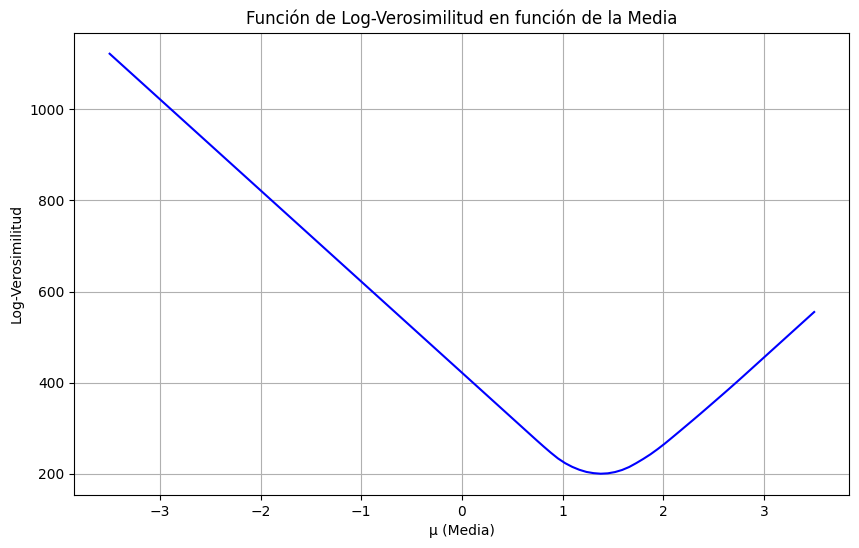

In [35]:
import matplotlib.pyplot as plt
data = df_paltas_copy['AveragePrice'].sample(200)

mu_values = np.linspace(-3.5, 3.5, 100)
log_likelihood_values = np.zeros_like(mu_values)

for i, mu in enumerate(mu_values):
    params = (mu, 1.0)
    log_likelihood_values[i] = laplace_log_likelihood(params, data)

plt.figure(figsize=(10, 6))
plt.plot(mu_values, log_likelihood_values, color='blue')
plt.xlabel('μ (Media)')
plt.ylabel('Log-Verosimilitud')
plt.title('Función de Log-Verosimilitud en función de la Media')
plt.grid(True)
plt.show()

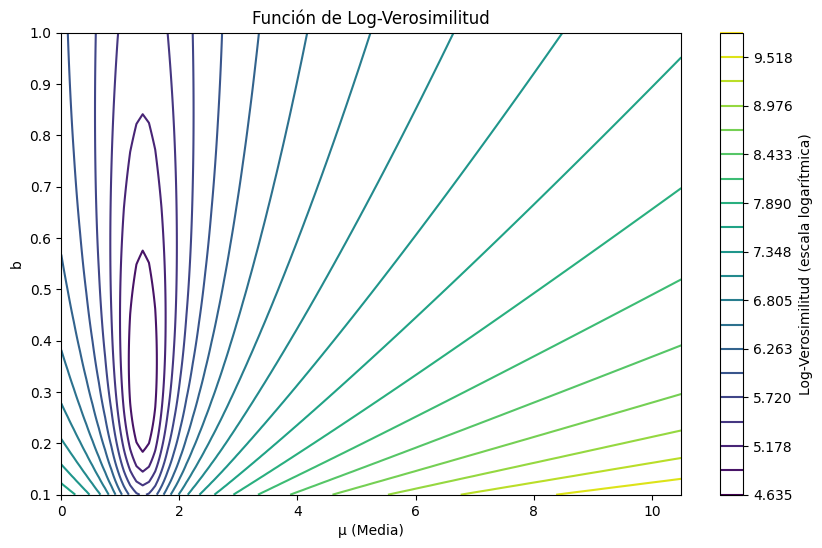

In [36]:
mu_values = np.linspace(0, 10.5, 100)
b_values = np.linspace(0.1, 1, 100)
mu_grid, b_grid = np.meshgrid(mu_values, b_values)
params_grid = np.stack((mu_grid, b_grid), axis=-1)

log_likelihood_values = np.zeros_like(mu_grid)
for i in range(mu_grid.shape[0]):
    for j in range(mu_grid.shape[1]):
        params = (mu_grid[i, j], b_grid[i, j])
        log_likelihood_values[i, j] = laplace_log_likelihood(params, data)

log_likelihood_values = np.log(log_likelihood_values)

levels = np.linspace(log_likelihood_values.min(), log_likelihood_values.max(), 20)

plt.figure(figsize=(10, 6))
plt.contour(mu_grid, b_grid, log_likelihood_values, levels=levels, cmap='viridis')
plt.colorbar(label='Log-Verosimilitud (escala logarítmica)')
plt.xlabel('μ (Media)')
plt.ylabel('b')
plt.title('Función de Log-Verosimilitud')
plt.show()

In [37]:

estimated_mu = bisection_method(100, -3.5, 3.5, data)

print("Estimador de Máxima Verosimilitud (mu):", estimated_mu)

Estimador de Máxima Verosimilitud (mu): 1.38


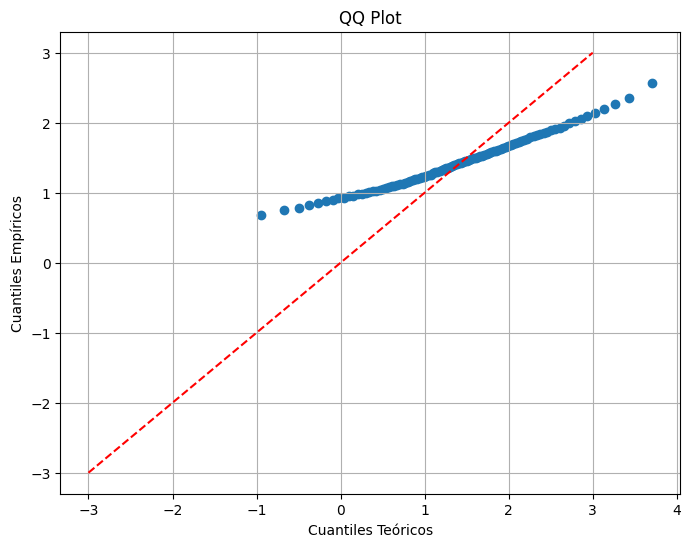

In [38]:
from scipy.stats import norm
data = df_paltas_copy['AveragePrice']

data_sorted = np.sort(data)

empirical_quantiles = np.percentile(data_sorted, np.arange(0, 100, 1))

empirical_quantiles = np.percentile(data_sorted, np.arange(0, 100, 1))

theoretical_quantiles = norm.ppf(np.arange(0, 100, 1) / 100, loc=estimated_mu)

plt.figure(figsize=(8, 6))
plt.scatter(theoretical_quantiles, empirical_quantiles)
plt.xlabel("Cuantiles Teóricos")
plt.ylabel("Cuantiles Empíricos")
plt.title("QQ Plot")
plt.grid(True)

plt.plot([-3, 3], [-3, 3], linestyle="--", color="red")

plt.show()

3. **(10pts)** En el contexto del ajuste de distribuciones estadísticas a datos observados, se pueden utilizar distribuciones con uno o dos parámetros. ¿Por qué podría ser preferible utilizar una distribución con 2 parámetros en lugar de "congelar" uno de ellos a un valor fijo? Dé algún ejemplo.

> Respuesta 3. Una distribución de dos parámetros variables tiene mayor flexibilidad para ajustarse a un conjunto de datos, por lo que podría ser preferible a dejar un parámetro fijo. Para ejemplificar podría buscarse un evento que dependa de más de un factor para ocurrir, por lo que una distribución con dos parámetros variables se ajustaría de mejor manera. Se propone el caso de dos eventos independientes que ocurren de forma simultánea. Para esto, utilizar dos parámetros variables entregaría la flexibilidad necesaria para su modelamiento.